**Proyecto: Análisis exploratorio de datos para decisiones comerciales**

Contexto: interpretar los datos y reconocer qué variables son realmente relevantes para mejorar la estrategia de ventas y marketing para una empresa de ventas de chocolates (data set encontrado en kaggle).
Idea:
Tu equipo ha sido convocado para explorar y visualizar los datos, detectar patrones, relaciones y valores atípicos, y entregar una propuesta clara y fundamentada que ayude a mejorar la toma de decisiones.

Objetivo:
El objetivo del proyecto es aplicar técnicas de análisis exploratorio de datos (EDA) sobre un conjunto de datos reales del negocio, con el fi n de obtener hallazgos relevantes que permitan comprender el comportamiento de los clientes y sustentar decisiones estratégicas. Al fi nalizar el proyecto, se espera entregar un informe técnico con visualizaciones, análisis estadístico y recomendaciones clave, demostrando dominio del EDA y herramientas como Seaborn y Matplotlib en Python.

**● Lección 1: ANÁLISIS EXPLORATORIO DE DATOS**

■ Generar un dataset para poder analizarlo

■ Distinguir variables cuantitativas y categóricas

■ Detectar valores faltantes o inconsistencias (IDA)

■ Documentar primeros hallazgos en Visual Studio Code

In [ ]:
#Generar un dataset para poder analizarlo -> Inicialmente se busca un dataset de estudio en kaggle para tomar una base realista de los datos y estos tengan coherencia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# para leer archivo desde google drive
#conectando google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Ruta completa dentro de tu Google Drive
ruta = '/content/drive/MyDrive/Colab Notebooks/Ciencia de Datos Talento Digital/Modulo 4/Chocolate Sales.csv'
df = pd.read_csv(ruta)
# Mostrar primeras filas
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184
...,...,...,...,...,...,...
3277,Karlen McCaffrey,Australia,Spicy Special Slims,17/05/2024,"$5,303.58",354
3278,Jehu Rudeforth,USA,White Choc,07/06/2024,"$7,339.32",121
3279,Ches Bonnell,Canada,Organic Choco Syrup,26/07/2024,$616.09,238
3280,Dotty Strutley,India,Eclairs,28/07/2024,"$2,504.62",397


In [ ]:
#  Distinguir variables cuantitativas y categóricas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [6]:
def data_quality_analysis(data):
    # Crear un nuevo dataframe para almacenar los resultados
    result_df = pd.DataFrame(columns=['Columna', 'Tipo de dato', 'Valores únicos', 'Valores faltantes','% faltantes'])

    # Obtener información general del dataframe
    columns = data.columns
    data_types = data.dtypes.to_list()
    unique_values = [data[column].nunique() for column in columns]
    missing_values = [data[column].isnull().sum() for column in columns]
    missing_percentage = [data[column].isnull().mean()*100 for column in columns]

    # Llenar el nuevo dataframe con los resultados
    result_df['Columna'] = columns
    result_df['Tipo de dato'] = data_types
    result_df['Valores únicos'] = unique_values
    result_df['Valores faltantes'] = missing_values
    result_df['% faltantes'] = missing_percentage

    return result_df

# Ejemplo de uso de la función con el dataframe 'df'
analysis_result = data_quality_analysis(df).set_index('Columna')
print(analysis_result.sort_values('Tipo de dato'))
print(df.shape)

              Tipo de dato  Valores únicos  Valores faltantes  % faltantes
Columna                                                                   
Boxes Shipped        int64             507                  0          0.0
Sales Person        object              25                  0          0.0
Country             object               6                  0          0.0
Product             object              22                  0          0.0
Date                object             504                  0          0.0
Amount              object            3013                  0          0.0
(3282, 6)


In [ ]:
#Detectar valores faltantes o inconsistencias (IDA): lo que se puede ver anteriormente que Amount deberia ser tipo float y date tipo date

In [7]:
df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-682/1044363066.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)


In [8]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

In [9]:
df.info()
display (df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 154.0+ KB


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.00,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.00,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.00,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.00,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.00,184
...,...,...,...,...,...,...
3277,Karlen McCaffrey,Australia,Spicy Special Slims,2024-05-17,5303.58,354
3278,Jehu Rudeforth,USA,White Choc,2024-06-07,7339.32,121
3279,Ches Bonnell,Canada,Organic Choco Syrup,2024-07-26,616.09,238
3280,Dotty Strutley,India,Eclairs,2024-07-28,2504.62,397


In [10]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Conclusion primer apartado:
"""
Primeros Hallazgos del Análisis Exploratorio:

Se corrigió el formato de variables numéricas.
No se detectaron valores nulos significativos.
No se encontraron registros duplicados.
"""

In [ ]:
# donde se analizara cada variable por medio de un histograma y boxplot para saber como es su distribucion

Lección 2: CONCEPTOS BÁSICOS DE ESTADÍSTICA DESCRIPTIVA

■ Calcular media, mediana, moda, varianza, desviación estándar

■ Determinar cuartiles y percentiles

■ Generar histogramas y boxplots

■ Identifi car valores atípicos y documentar su impacto

In [ ]:
#Calcular media, mediana, moda, varianza y desviación estándar: en esta data se consideran solo las variables numericas

In [11]:
#Por medio de describe() que determina la media,mediana y desviacion estandar
df[["Amount", "Boxes Shipped"]].describe()

,Amount,Boxes Shipped
count,3282.000000,3282.000000
mean,6030.338775,164.666971
std,4393.980200,124.024736
min,7.000000,1.000000
25%,2521.495000,71.000000
50%,5225.500000,137.000000
75%,8556.842500,232.000000
max,26170.950000,778.000000


In [12]:
#otra forma y de manera individual
# MEDIA
print('-----------------MEDIA--------------------')

print(df[["Amount", "Boxes Shipped"]].mean())
print('-------------------------------------')

# MEDIANA
print('-----------------MEDIANA--------------------')
print(df[["Amount", "Boxes Shipped"]].median())
print('-------------------------------------')

# MODA
print('-----------------MODA--------------------')
print(df[["Amount", "Boxes Shipped"]].mode())
print('-------------------------------------')

# VARIANZA
print('-----------------VARIANZA--------------------')
print(df[["Amount", "Boxes Shipped"]].var())
print('-------------------------------------')

# DESVIACIÓN ESTÁNDAR
print('-----------------DESVIACION ESTANDAR--------------------')
print(df[["Amount", "Boxes Shipped"]].std())

-----------------MEDIA--------------------
Amount           6030.338775
Boxes Shipped     164.666971
dtype: float64
-------------------------------------
-----------------MEDIANA--------------------
Amount           5225.5
Boxes Shipped     137.0
dtype: float64
-------------------------------------
-----------------MODA--------------------
   Amount  Boxes Shipped
0  2317.0             24
1     NaN             46
2     NaN             58
-------------------------------------
-----------------VARIANZA--------------------
Amount           1.930706e+07
Boxes Shipped    1.538214e+04
dtype: float64
-------------------------------------
-----------------DESVIACION ESTANDAR--------------------
Amount           4393.980200
Boxes Shipped     124.024736
dtype: float64


In [13]:
#Cuartiles y percentiles
# Cuartiles
display(df[["Amount", "Boxes Shipped"]].quantile([0.25, 0.5, 0.75]))

# Percentiles específicos
df["Amount"].quantile([0.10, 0.90, 0.95])

,Amount,Boxes Shipped
0.25,2521.4950,71.0
0.50,5225.5000,137.0
0.75,8556.8425,232.0


,Amount
0.10,1062.749
0.90,12190.978
0.95,14686.899


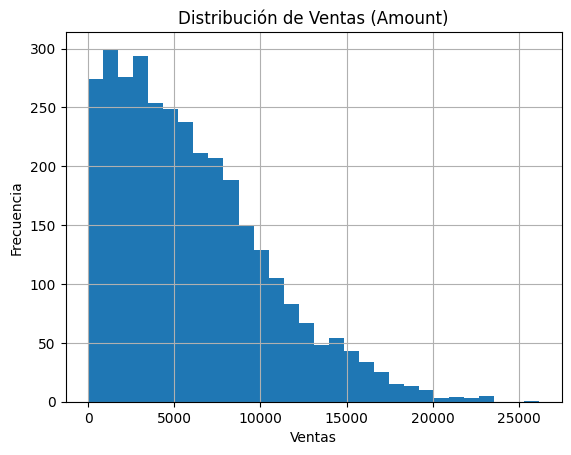

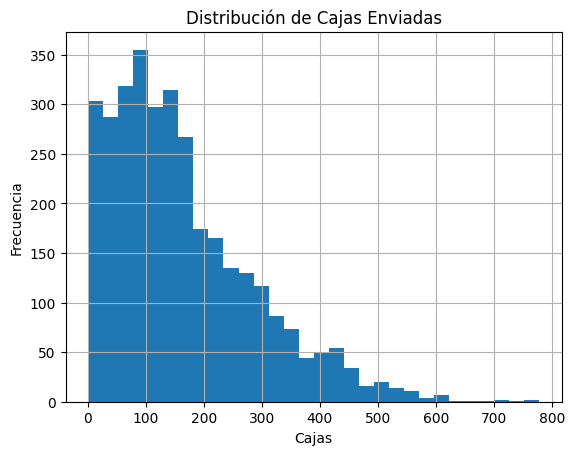

In [14]:
#Histogramas
plt.figure()
df["Amount"].hist(bins=30)
plt.title("Distribución de Ventas (Amount)")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.show()

plt.figure()
df["Boxes Shipped"].hist(bins=30)
plt.title("Distribución de Cajas Enviadas")
plt.xlabel("Cajas")
plt.ylabel("Frecuencia")
plt.show()

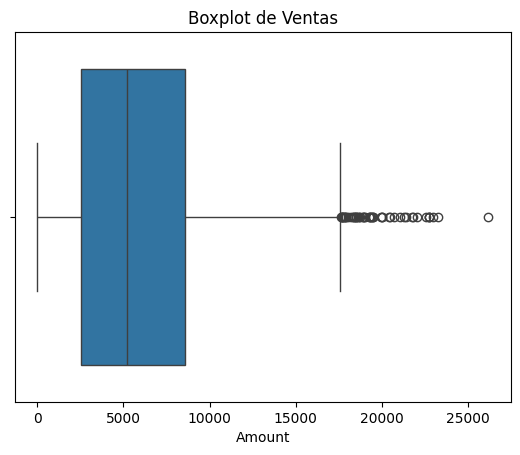

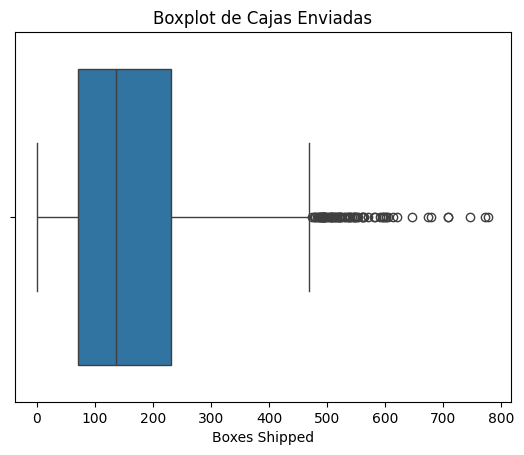

In [15]:
#boxplot
plt.figure()
sns.boxplot(x=df["Amount"])
plt.title("Boxplot de Ventas")
plt.show()

plt.figure()
sns.boxplot(x=df["Boxes Shipped"])
plt.title("Boxplot de Cajas Enviadas")
plt.show()

In [16]:
#Identificar valores atípicos (método IQR)
Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df["Amount"] < limite_inferior) |
              (df["Amount"] > limite_superior)]

outliers.shape

(50, 6)

In [ ]:
"""
Análisis Estadístico Descriptivo

Las variables cuantitativas presentan una distribución asimétrica positiva, con presencia de valores atípicos superiores. La diferencia entre media y mediana sugiere que existen ventas significativamente altas que elevan el promedio general.
El análisis mediante IQR permitió identificar transacciones extremas, las cuales podrían estar asociadas a grandes pedidos o acuerdos comerciales especiales. Se recomienda analizarlas por separado para evaluar si corresponden a patrones recurrentes o eventos aislados.
"""

Lección 4: REGRESIONES LINEALES

■ Aplicar modelos con statsmodels

■ Calcular R², MSE, MAE

■ Evaluar significancia de predictores

■ Interpretar coeficientes e inferencias básicas

■ Visualizar la regresión con Seaborn

In [17]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [18]:
#aplicar modelo
X = df["Boxes Shipped"]
y = df["Amount"]

# Agregar constante (β0)
X = sm.add_constant(X)

In [19]:
modelo = sm.OLS(y, X).fit()
#Evaluar significancia de predictores
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5676
Date:                Sat, 28 Feb 2026   Prob (F-statistic):              0.451
Time:                        02:25:52   Log-Likelihood:                -32186.
No. Observations:                3282   AIC:                         6.438e+04
Df Residuals:                    3280   BIC:                         6.439e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6107.0767    127.506     47.896

In [ ]:
#Interpretar coeficientes
#esto nos rea un modelo y=ax+b = -0.4660*x + 6107

In [20]:
#Calcular R², MSE y MAE
# Predicciones
y_pred = modelo.predict(X)

# R²
r2 = modelo.rsquared

# MSE
mse = mean_squared_error(y, y_pred)

# MAE
mae = mean_absolute_error(y, y_pred)

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: 0.00017302425149190448
MSE: 19297839.7127194
MAE: 3526.4730736133242


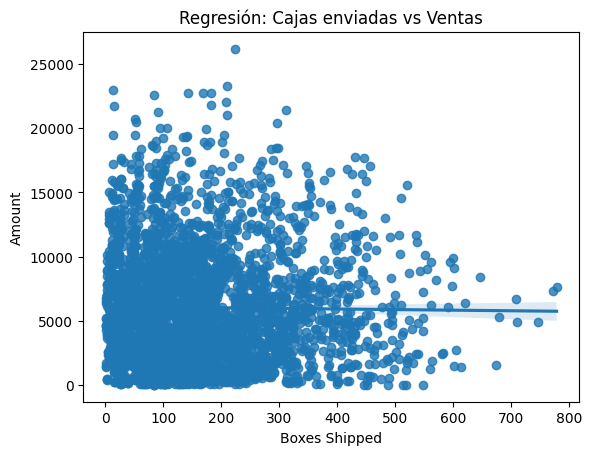

In [21]:
#Visualizar regresión con Seaborn
sns.regplot(x="Boxes Shipped", y="Amount", data=df)
plt.title("Regresión: Cajas enviadas vs Ventas")
plt.show()

In [22]:
df[["Amount", "Boxes Shipped"]].corr()

,Amount,Boxes Shipped
Amount,1.000000,-0.013154
Boxes Shipped,-0.013154,1.000000


In [ ]:
"""
Análisis de correlación

El coeficiente de correlación de Pearson entre "Boxes Shipped" y "Amount" fue de -0.013, lo que indica una relación lineal prácticamente inexistente entre ambas variables.
La nube de puntos presenta alta dispersión y ausencia de tendencia clara, lo que confirma que la cantidad de cajas enviadas no explica significativamente el monto total de ventas.
Este resultado sugiere que el ingreso generado depende más del tipo de producto, precio unitario o mercado de destino, que del volumen de unidades enviadas.

Esto explica porque la nube de puntos presenta datos tan dispersos.
"""

Lección 5: ANÁLISIS VISUAL DE DATOS

■ Crear gráficos de tipo pairplot, violinplot, jointplot y heatmap

■ Construir visualizaciones que combinen múltiples variables

■ Ajustar parámetros de estilo, colores, tamaños

■ Utilizar FacetGrid para segmentar por categorías

■ Documentar insights visuales

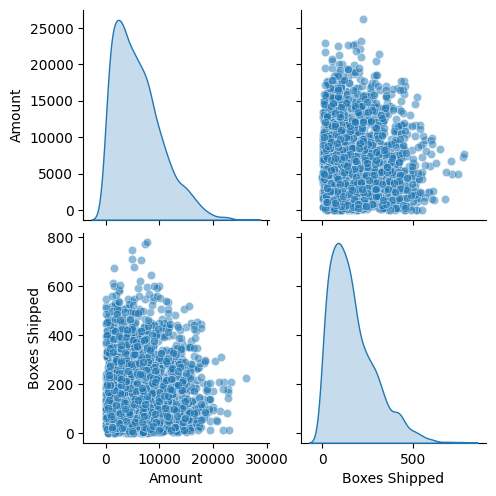

In [23]:
#Pairplot (relaciones entre variables numéricas)
sns.pairplot(
    df[["Amount", "Boxes Shipped"]],
    diag_kind="kde",
    plot_kws={"alpha": 0.5}
)
plt.show()

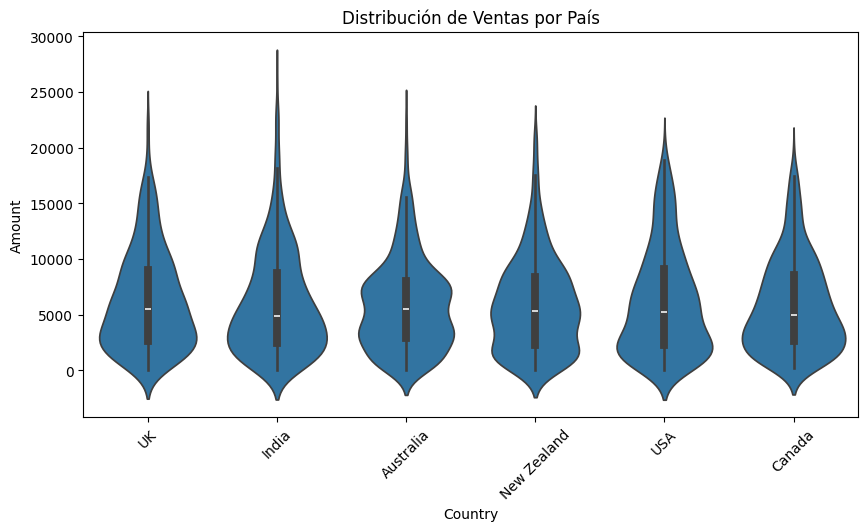

In [24]:
#Violinplot (distribución por categoría)
plt.figure(figsize=(10,5))
sns.violinplot(x="Country", y="Amount", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de Ventas por País")
plt.show()

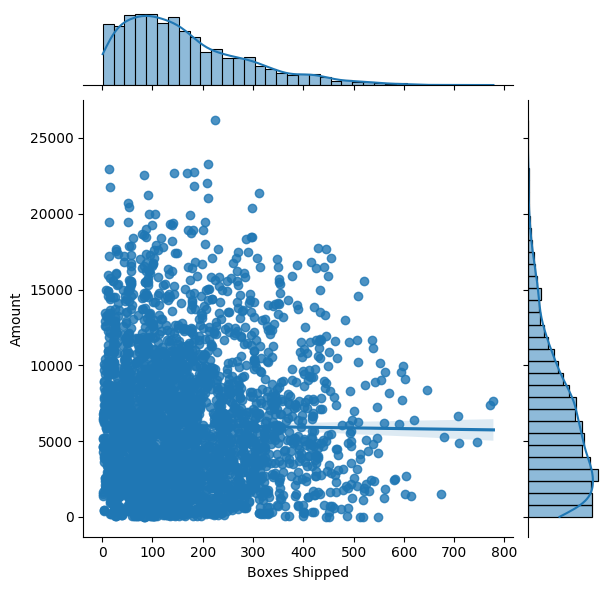

In [26]:
#Jointplot (relación + distribución)
sns.jointplot(
    x="Boxes Shipped",
    y="Amount",
    data=df,
    kind="reg",
    height=6
)
plt.show()

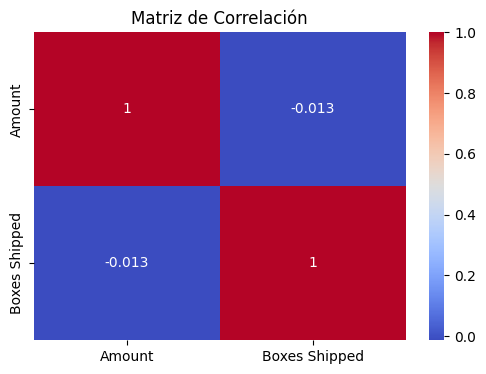

In [27]:
#Heatmap (matriz de correlación)
corr = df[["Amount", "Boxes Shipped"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

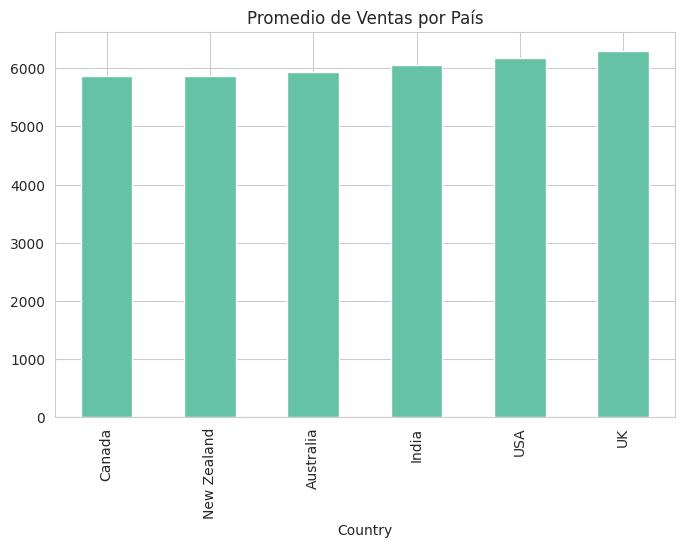

In [33]:
#Visualizaciones combinando múltiples variables
ventas_pais = df.groupby("Country")["Amount"].mean().sort_values()

ventas_pais.plot(kind="bar", figsize=(8,5))
plt.title("Promedio de Ventas por País")
plt.show()

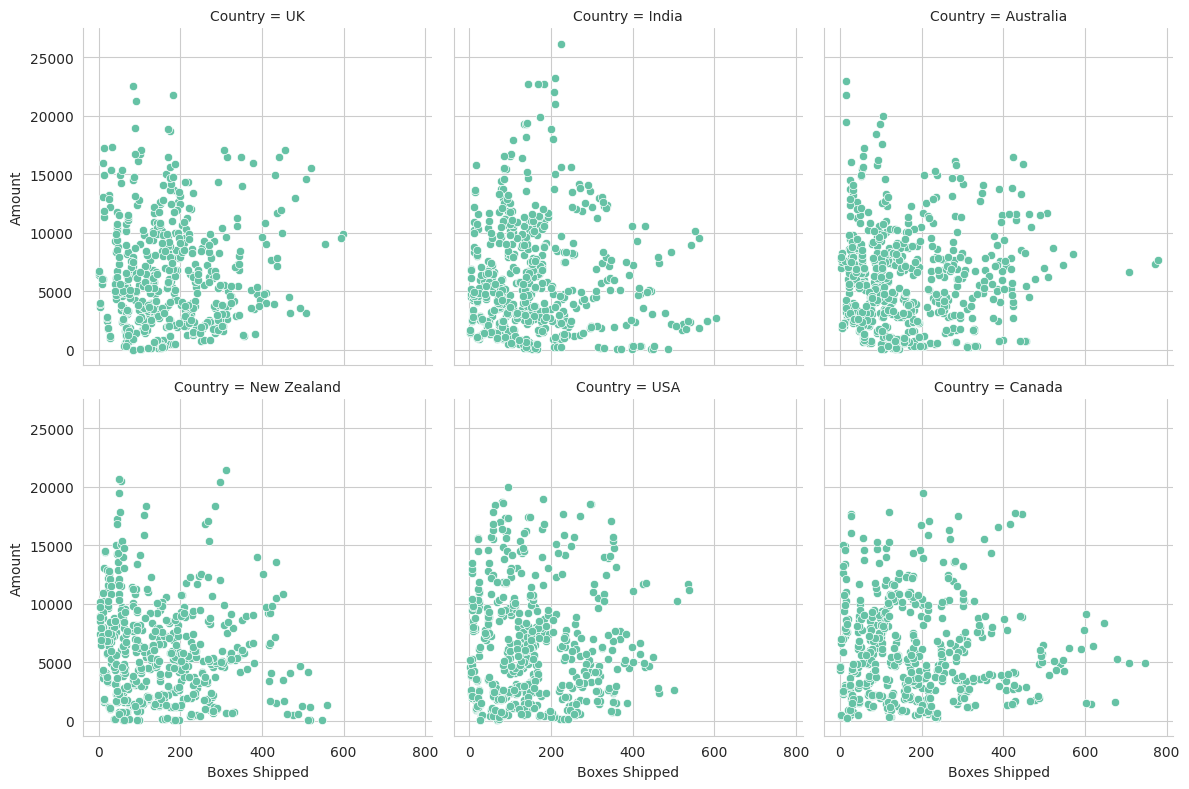

In [34]:
#FacetGrid (segmentar por categoría)
g = sns.FacetGrid(df, col="Country", col_wrap=3, height=4)
g.map(sns.scatterplot, "Boxes Shipped", "Amount")
plt.show()

Lección 6: LIBRERÍA MATPLOTLIB

■ Crear figuras y subplots

■ Personalizar títulos, etiquetas, leyendas, ticks

■ Usar anotaciones, límites y formatos de archivo

■ Generar una presentación con gráficos finales

■ Entregar informe EDA con visualizaciones embebidas

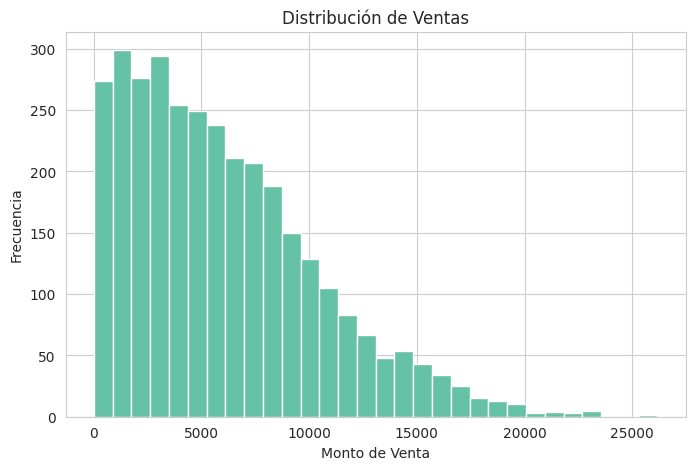

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))

ax.hist(df["Amount"], bins=30)

ax.set_title("Distribución de Ventas")
ax.set_xlabel("Monto de Venta")
ax.set_ylabel("Frecuencia")

plt.show()

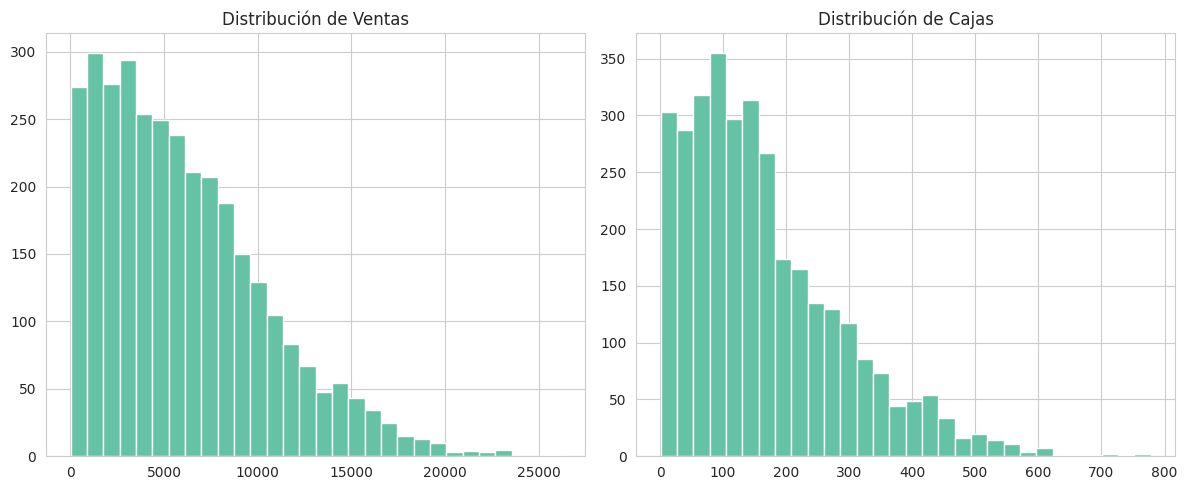

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Histograma ventas
ax[0].hist(df["Amount"], bins=30)
ax[0].set_title("Distribución de Ventas")

# Histograma cajas
ax[1].hist(df["Boxes Shipped"], bins=30)
ax[1].set_title("Distribución de Cajas")

plt.tight_layout()
plt.show()

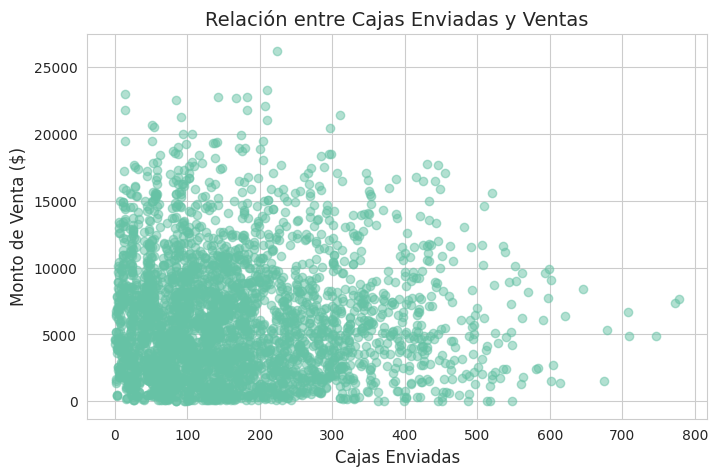

In [38]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(df["Boxes Shipped"], df["Amount"], alpha=0.5)

ax.set_title("Relación entre Cajas Enviadas y Ventas", fontsize=14)
ax.set_xlabel("Cajas Enviadas", fontsize=12)
ax.set_ylabel("Monto de Venta ($)", fontsize=12)

ax.tick_params(axis='both', labelsize=10)

plt.show()

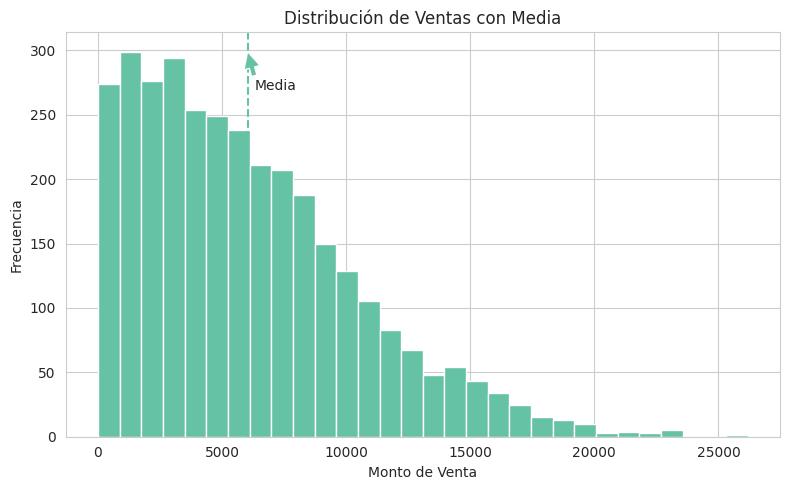

In [50]:
media = df["Amount"].mean()

fig, ax = plt.subplots(figsize=(8,5))

# Crear histograma y capturar valores
counts, bins, patches = ax.hist(df["Amount"], bins=30)

# Obtener altura máxima del histograma
max_y = counts.max()

ax.axvline(media, linestyle='--')

ax.annotate("Media",
            xy=(media, max_y),
            xytext=(media*1.05, max_y*0.9),
            arrowprops=dict())

ax.set_title("Distribución de Ventas con Media")
ax.set_xlabel("Monto de Venta")
ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.savefig("archivo.pdf", dpi=300, bbox_inches="tight") #aqui se guarda todo el plot visualizado en formato pdf
plt.savefig("figura1.png", dpi=300)# aqui se guarda en formato png
plt.show()

In [46]:
#este es para verificar que se guardo realmente el archivo
!ls

archivo.pdf  drive  grafico_final.pdf  grafico_ventas.png  sample_data


In [48]:
#este nos dice donde se guarda el grafico
import os
os.getcwd()

'/content'

In [51]:
#aqui se descarga el archivo directo a nuestro computador
from google.colab import files
files.download("figura1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>